In [1]:
from coursea import *

await init()

init securities done


[0.7, 0.15, 0.15]


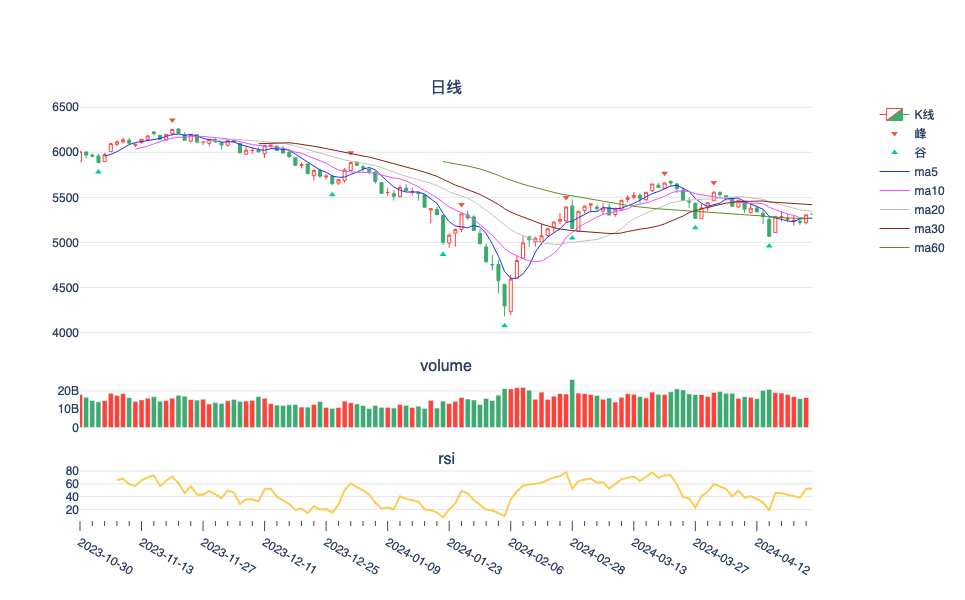

[0.7, 0.15, 0.15]


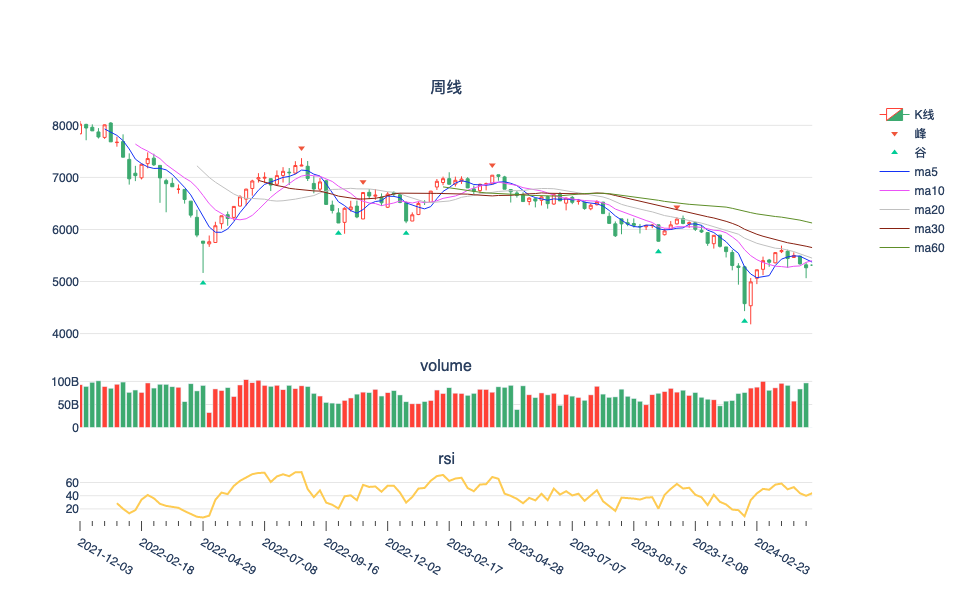

In [37]:
dbars = await Stock.get_bars("000852.XSHG", 120, FrameType.DAY)
wbars = await Stock.get_bars("000852.XSHG", 120, FrameType.WEEK)

dcs = Candlestick(dbars, title = "日线", show_peaks = True, height=600)
dcs.plot()

wcs = Candlestick(wbars, title = "周线", show_peaks = True, height=600)
wcs.plot()

In [46]:
# 周线rsi前高出现于2023年11月17日，数值为60.5（此处计算出57.9，疑似数据库中数据有误）
wclose = wbars["close"].astype(np.float64).copy()

nov_17 = np.datetime64(datetime.date(2023,11, 17))
i = np.flatnonzero(wbars["frame"] == nov_17)[0]

rsi = np.round(ta.RSI(wclose, 6), 1)
rsi[i]


57.9

In [47]:
# 3月22日，周线rsi数值盘中突破 61.9，高于前高60.5，触发回调

mar_22 = np.datetime64(datetime.date(2024, 3, 22))
i = np.flatnonzero(wbars["frame"] == mar_22)[0]

wclose[i] = wbars["high"][i]

rsi = np.round(ta.RSI(wclose.astype(np.float64), 6), 1)
rsi[i]

61.9

In [52]:
# 日线2月27日、3月18日顶背离，前者RSI 78.3,后者RSI 77.7
dclose = np.round(dbars["close"].astype(np.float64), 2)
drsi = np.round(ta.RSI(dclose, 6), 1)

for dt in (datetime.date(2024, 2, 27), datetime.date(2024, 3, 18)):
    i = np.flatnonzero(dbars["frame"] == np.datetime64(dt))[0]
    print(dt, dclose[i], drsi[i])

2024-02-27 5394.03 78.3
2024-03-18 5648.01 77.7


In [33]:
i = np.flatnonzero(dbars["frame"] == np.datetime64(datetime.date(2024,3,18)))[0]

In [34]:
drsi[i]

77.7